# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position, for this, start timer and end timer
- memory usage, need to figure this out
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - Using the stats.get_time_to_path(path) func, it can show which path truly takes the least time not depending on distance traveled or number of turns
- To compare between diff algorithms, I need to compare:
    - memory usage by each algorithm (if more than 2gbs, there is a problem)
    - Time it takes for path taken (most important I think)
    - Time taken for algorithm to run
    - Maybe need to run and algorithm on each maze for figuring out the maze, the floodfill x BFS, or just BFS, this will help identify in real life, how long it would take to figure out the maze before the algorithms even start. Most prob would be all offline. If online, we store the path taken by each algorithm, use that same algorithm to get the path back to the start (or use floodfill) while simulatuasly running the algorithm to find the path to get the path to centre. This would give me the time for everything given that I have 10 mins to try taking the most optimal path. ////

To compare your algorithms effectively, especially with a dataset of around 300 mazes from previous competitions, you'll want to consider multiple metrics that highlight different aspects of performance. Here's a structured approach you can use:

### 1. **Metrics Collection**
   - **Memory Usage**: Track the peak and average memory usage during the algorithm's execution. This will help you understand the memory efficiency of each algorithm.
   - **Execution Time**: Measure the total time taken to find a solution for each maze. This includes the entire runtime of the algorithm, from start to finish.
   - **Path Quality Metrics**:
     - **Time to Traverse Path**: Calculate the time the micromouse would take to follow the path, considering acceleration, deceleration, and turns. This helps assess how optimal the path is in practice.
     - **Path Length**: Measure the total distance of the path found by the algorithm. Shorter paths are typically better.
     - **Number of Turns**: Count the number of turns in the path. Fewer turns can indicate a more efficient path in terms of maintaining speed and reducing wear on the mouse.

### 2. **Data Aggregation**
   - **Mean and Median**: Calculate the mean and median of each metric across all 300 mazes. This will give you an idea of the overall performance and consistency of each algorithm.
   - **Standard Deviation**: Assess the variability in performance. High variance might indicate that the algorithm performs well in some cases but poorly in others.
   - **Percentiles**: Look at the 25th, 50th (median), and 75th percentiles to understand the distribution of performance metrics.

### 3. **Comparison Criteria**
   - **Efficiency**: Compare the execution time and memory usage. Algorithms that use less memory and run faster are more efficient.
   - **Path Optimality**: Compare the path quality metrics (time to traverse, path length, number of turns). Algorithms that consistently find shorter, faster paths with fewer turns are more optimal.
   - **Robustness**: Consider how each algorithm handles different maze complexities (e.g., simple vs. complex mazes). An algorithm that performs consistently well across all types of mazes might be more robust.

### 4. **Visualization**
   - **Box Plots**: Use box plots to visualize the distribution of metrics like execution time, path length, and the number of turns. This will help you identify outliers and the general distribution of your data.
   - **Bar Charts**: For comparing mean values across algorithms, bar charts can be useful.
   - **Scatter Plots**: If you want to visualize the relationship between two metrics (e.g., path length vs. number of turns), scatter plots can be insightful.

### 5. **Statistical Analysis**
   - **ANOVA or Kruskal-Wallis Test**: Use these statistical tests to determine if there are significant differences in performance metrics between the algorithms.
   - **Pairwise Comparisons**: If you find significant differences, use pairwise comparison tests (like Tukey's HSD) to determine which algorithms differ significantly from each other.

### 6. **Benchmarking and Case Studies**
   - **Benchmark Mazes**: Identify a few representative mazes from your dataset that are particularly challenging or typical. Compare how each algorithm performs on these mazes in detail.
   - **Case Studies**: Perform a detailed analysis of a few selected mazes where algorithms show distinct performance differences. This can provide insights into why certain algorithms perform better or worse in specific scenarios.

### 7. **Summary and Recommendations**
   - **Rank the Algorithms**: Based on the collected data, rank the algorithms according to different criteria (e.g., overall efficiency, path optimality).
   - **Identify Trade-offs**: Highlight any trade-offs between different algorithms (e.g., one might be faster but produce longer paths).
   - **Make Recommendations**: Based on your findings, recommend which algorithm might be best suited for different types of mazes or competition settings.

This comprehensive approach will allow you to make well-informed decisions about which algorithm is the best overall and which might be better suited to specific scenarios.

In [2]:
import glob
import json
import os

from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

from algorithms.ExploreMaze import ExploreMaze
import pandas as pd

In [3]:
maze = Utils.load_maze('mazes/competition_json/alljapan-031-2010-exp-fin.json')

In [4]:
def get_mazes_json(dirname):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()} 
    return mazes

In [5]:
mazes = get_mazes_json('mazes/competition_json')

## Classical Algorithms

In [6]:
# utils = Utils()
# stats = Stats()
# explore = ExploreMaze(maze=maze)
# explore.move_and_floodfill()
# walls = explore.get_walls()
# utils.draw_maze(walls, dist_map=explore.flood_fill(explore.get_goal_position()), path=explore.path)
# # print(walls == maze)
# print(explore.path)
# print(stats.get_time_from_path(explore.path))

### Floodfill

In [12]:
import time
def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time

stats = Stats()
remove_mazes = []
flood_paths = []
flood_path_times = []
flood_turns = []
flood_distances = []
flood_exec_time = []
for name, item in mazes.items():
    try:
        start_time = time.perf_counter_ns()
        flood = FloodFill(walls=item)
        flood_exec_time.append(get_runtime(start_time) * pow(10, -3))
        path = flood.get_path_from_flood_map()
        flood_paths.append(path)
        flood_path_times.append(stats.get_time_from_path(path))
        dist, turns = flood.get_stats()
        flood_distances.append(stats.get_dist_travelled())
        flood_turns.append(turns)
    except Exception as e:
        remove_mazes.append(name)
for name in remove_mazes:
    del mazes[name]

maze_names = mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': flood_paths,
    'Path Time (s)': flood_path_times,
    'Turns': flood_turns,
    'Distance Travelled (m)': flood_distances,
    'Execution Time (micro secs)': flood_exec_time
}

# Convert the dictionary to a DataFrame
flood_fill_df = pd.DataFrame(data).set_index('Maze Name')

In [13]:
flood_fill_df

,Path,Path Time (s),Turns,Distance Travelled (m),Execution Time (micro secs)
Maze Name,,,,,
13ye,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",18.241782,21,5.985,84.5
50,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",27.575872,38,11.610,69.5
86,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",5.598013,6,13.455,53.9
87sin,"[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2...",13.623074,15,17.730,49.9
87us1,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",24.619658,32,23.355,52.8
...,...,...,...,...,...
xx,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",9.109604,9,2521.980,51.0
yama2002,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",14.739266,16,2526.795,52.3
yama7,"[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2...",12.889292,14,2531.070,53.4


In [8]:
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())

(58, 34, 0)


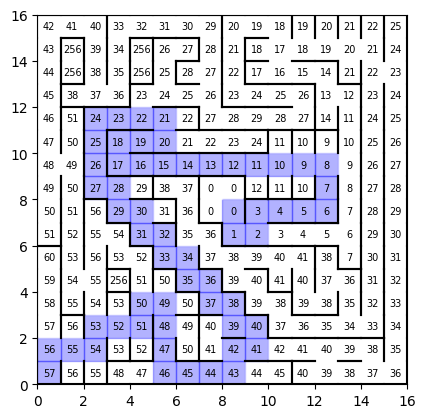

In [9]:
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)

In [10]:
stats = Stats()
print(stats.get_time_from_path(flood_path))

24.785656921953453


### BFS

In [11]:
bfs = BFS(walls=maze)
bfs_path = bfs.find_shortest_path_to_goal()
print(bfs.get_stats())

2
(58, 34, 0)


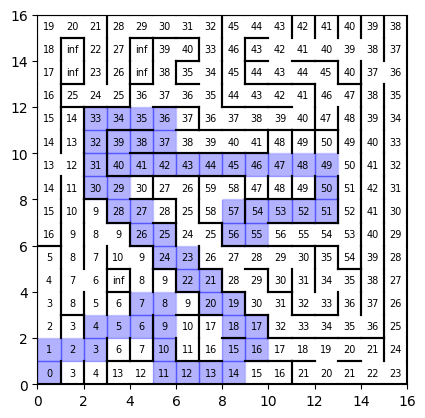

In [12]:
Utils().draw_maze(walls=maze, path=bfs_path, dist_map = bfs.distances)

In [13]:
stats = Stats()
print(stats.get_time_from_path(bfs_path))

24.785656921953453


### Dijkstra

In [14]:
dijkstra = Dijkstra(walls=maze)
dijkstra_path = dijkstra.find_shortest_path_to_goal()
print(dijkstra.get_stats())

Total memory used: 0.00390625 MB
(58, 36, 0)


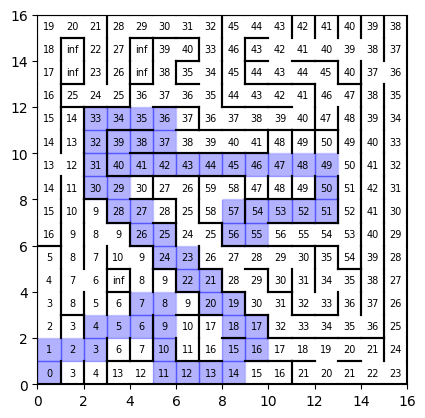

In [15]:
Utils().draw_maze(walls=maze, path=dijkstra_path, dist_map = dijkstra.distances)

In [16]:
print(stats.get_time_from_path(dijkstra_path))

24.785656921953453


### A*

In [17]:
astar = AStar(walls=maze)
astar_path = (astar.find_shortest_path_to_goal())
print(astar.get_stats())

Filename: D:\Diss\Simulator\final\algorithms\classical\astar\AStar.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    51    177.0 MiB    177.0 MiB           1       @profile
    52                                             def find_shortest_path_to_goal(self):
    53    177.0 MiB      0.0 MiB           1           self.a_star()
    54    177.0 MiB      0.0 MiB           9           goal_position = min(self.goal_positions, key=lambda pos: self.distances[pos[0]][pos[1]])
    55    177.0 MiB      0.0 MiB           1           self.curr_position = goal_position
    56    177.0 MiB      0.0 MiB           1           self.path.append(self.curr_position)
    57                                         
    58    177.0 MiB      0.0 MiB          58           while self.curr_position != self.start_position:
    59    177.0 MiB      0.0 MiB          57               x, y = self.curr_position
    60    177.0 MiB      0.0 MiB         399               neighbors = [(x + dx, y + d

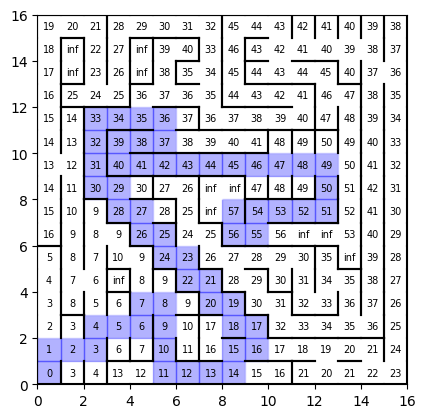

In [18]:
Utils().draw_maze(walls=maze, path=astar_path, dist_map = astar.distances)

In [19]:
stats = Stats()
print(stats.get_time_from_path(astar_path))

24.785656921953453


## Reinforcememnt Learning

### Sarsa

In [20]:
sarsa = Sarsa(walls=maze)

Running agent: 0
stopped at episode: 375
Running agent: 1
stopped at episode: 79
Running agent: 2
stopped at episode: 336
Running agent: 3
stopped at episode: 92
Running agent: 4
stopped at episode: 270
Running agent: 5
stopped at episode: 274
Running agent: 6
stopped at episode: 83
Running agent: 7
stopped at episode: 90
Running agent: 8
stopped at episode: 345
Running agent: 9
stopped at episode: 240
Running agent: 10
stopped at episode: 195
Running agent: 11
stopped at episode: 147
Running agent: 12
stopped at episode: 87
Running agent: 13
stopped at episode: 245
Running agent: 14
stopped at episode: 160
Choose path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 15), (2, 15), (2, 14), (2, 13), (2, 12), (3, 12), (3, 13), (3, 14), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (7, 14), (7, 13), (7, 12), (6, 12), (5, 12), (4, 12), (4, 11), (5, 11), (5, 10), (4, 10)

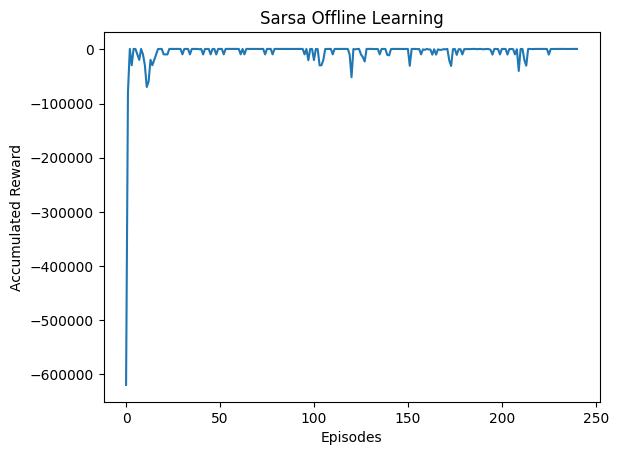

In [21]:
sarsa.run_sarsa()
sarsa_path = sarsa.get_path()

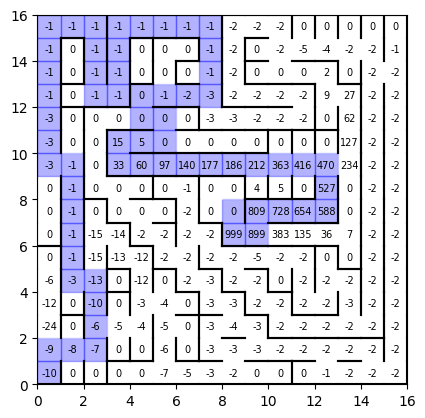

In [22]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path=sarsa_path)

In [23]:
stats = Stats()
stats.get_time_from_path(sarsa_path)

20.03813553530908

### QLearning


Running agent: 0
stopped at episode: 232
Running agent: 1
stopped at episode: 176
Running agent: 2
stopped at episode: 201
Running agent: 3
stopped at episode: 141
Running agent: 4
stopped at episode: 178
Running agent: 5
stopped at episode: 180
Running agent: 6
stopped at episode: 159
Running agent: 7
stopped at episode: 161
Running agent: 8
stopped at episode: 199
Running agent: 9
stopped at episode: 222
Running agent: 10
stopped at episode: 175
Running agent: 11
stopped at episode: 181
Running agent: 12
stopped at episode: 227
Running agent: 13
stopped at episode: 262
Running agent: 14
stopped at episode: 211
Choose path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 15), (2, 15), (2, 14), (2, 13), (2, 12), (3, 12), (3, 13), (3, 14), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (7, 14), (7, 13), (7, 12), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11), (11, 12),

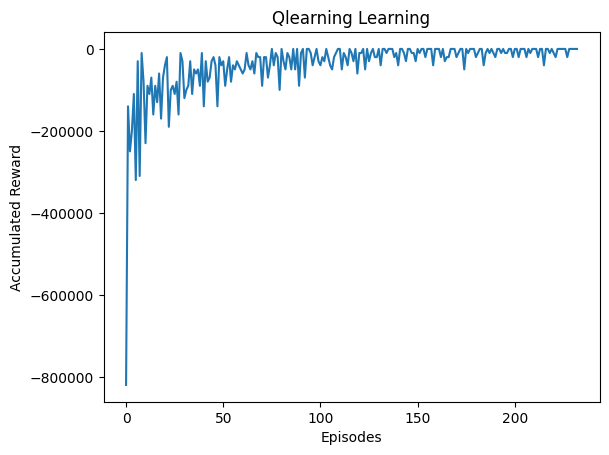

In [24]:
qlearning = QLearning(walls=maze)
qlearning.run_qlearning()
qlearning_path = qlearning.get_path()

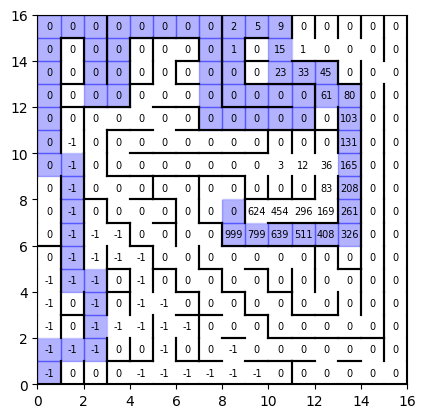

In [25]:
Utils.draw_maze(walls=maze, dist_map=qlearning.get_max_q_values(), path=qlearning_path)


In [26]:
stats = Stats()
stats.get_time_from_path(qlearning_path)

20.945281498147008

### DynaQ QLearning

Running agent: 0
stopped at episode: 27
Running agent: 1
stopped at episode: 29
Running agent: 2
stopped at episode: 15
Running agent: 3
stopped at episode: 8
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (14, 0), (15, 0), (15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (15, 7), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (14, 13), (14, 14), (13, 14), (12, 14), (11, 14), (10, 14), (10, 13), (11, 13), (12, 13), (12, 12), (13, 12), (13, 11), (13, 10), (13, 9), (13, 8), (13, 7), (13, 6), (12, 6), (11, 6), (10, 6), (9, 6), (8, 6), (8, 7)], time: 19.654228125504048


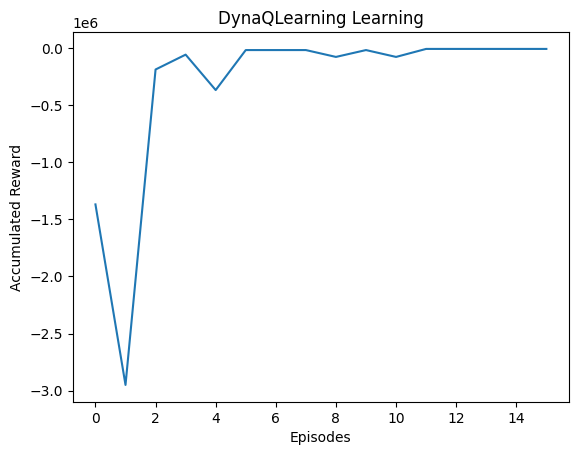

Memory usage at start: 181.46875 MB
Memory usage at end: 184.1484375 MB
Peak memory usage during execution: 1.9230422973632812 MB


In [27]:
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning_path = dyna_qlearning.get_path()

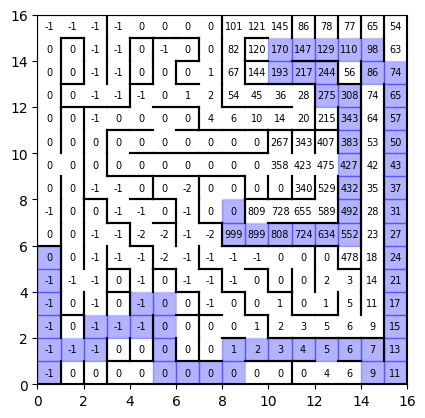

In [28]:
Utils.draw_maze(walls=maze, dist_map=dyna_qlearning.get_max_q_values(), path=dyna_qlearning_path)

In [29]:
stats = Stats()
stats.get_time_from_path(dyna_qlearning_path)

19.654228125504048

### DynaQ Sarsa


In [30]:
dynaq_sarsa = DynaQSarsa(walls=maze)
dynaq_sarsa.run_dyna_sarsa()
dynaq_sarsa_path = dynaq_sarsa.get_path()

Running agent: 0
stopped at episode: 33
Running agent: 1


KeyboardInterrupt: 

In [ ]:
Utils.draw_maze(walls=maze, dist_map=dynaq_sarsa.get_max_q_values(), path=dynaq_sarsa_path)

In [ ]:
stats = Stats()
stats.get_time_from_path(dynaq_sarsa_path)

In [ ]:
# Max deceleration on micro-mouse when calculating reward
1/(2*0.09)